In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [11]:
df1 = pd.read_csv("data.csv")
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [12]:
df1.shape



(4600, 18)

In [13]:
df1['waterfront'].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [14]:
df1['view'].value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [15]:
df1['country'].value_counts()

USA    4600
Name: country, dtype: int64

In [16]:
df2 = df1.drop(['country','yr_renovated','statezip','sqft_basement','sqft_above','date','sqft_lot','condition','view','street','waterfront'],axis='columns')

In [17]:
df2.shape
df2.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city
0,313000.0,3.0,1.50,1340,1.5,1955,Shoreline
1,2384000.0,5.0,2.50,3650,2.0,1921,Seattle
2,342000.0,3.0,2.00,1930,1.0,1966,Kent
3,420000.0,3.0,2.25,2000,1.0,1963,Bellevue
4,550000.0,4.0,2.50,1940,1.0,1976,Redmond


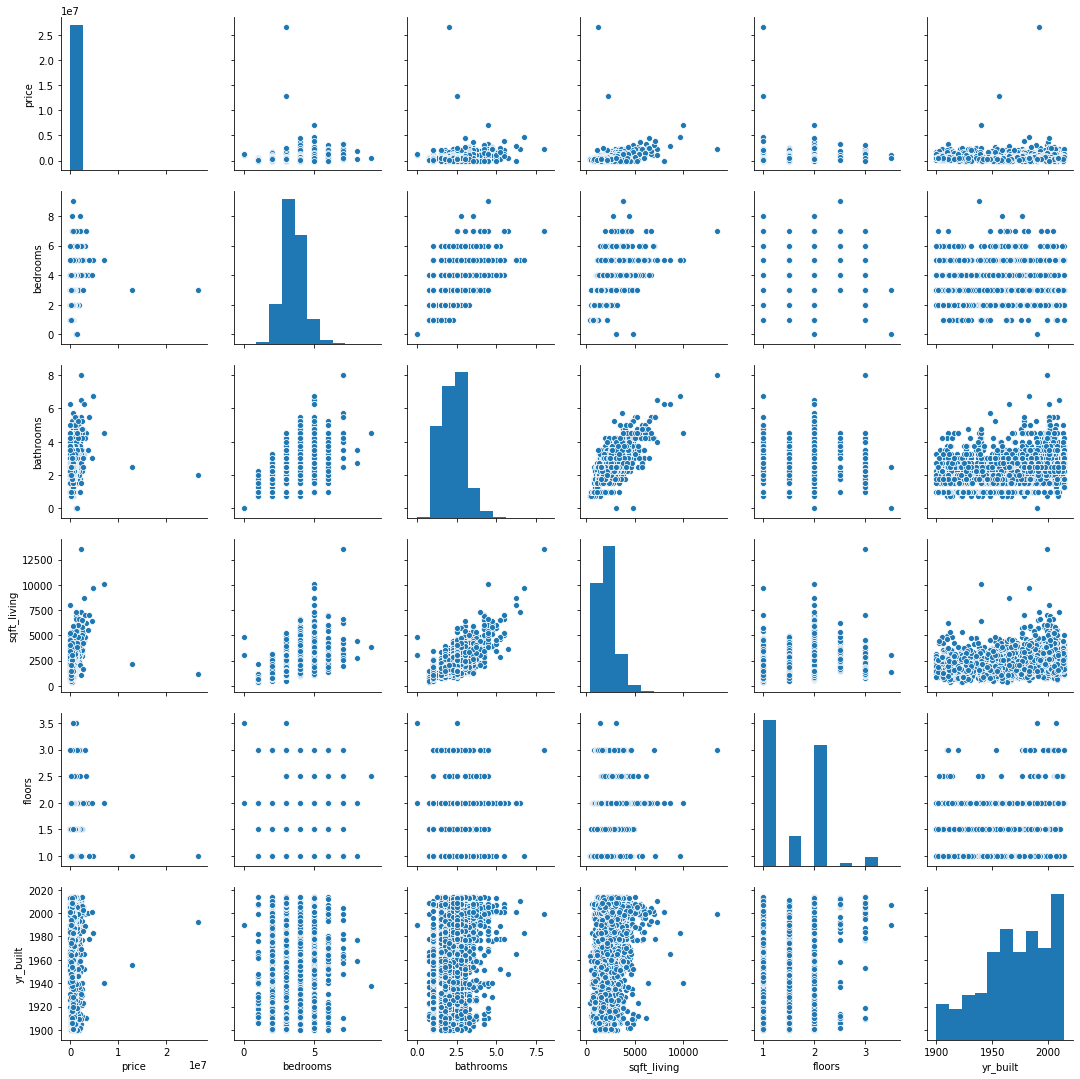

In [18]:
sns.pairplot(df2)

In [158]:
import math
def is_float(x):
        return math.ceil(x)
  

In [159]:
df3 = df2.copy()
df3.floors = df3.floors.apply(is_float)

In [160]:
df3.bathrooms = df3.bathrooms.apply(is_float)

In [161]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city
0,313000.0,3.0,2,1340,2,1955,Shoreline
1,2384000.0,5.0,3,3650,2,1921,Seattle
2,342000.0,3.0,2,1930,1,1966,Kent
3,420000.0,3.0,3,2000,1,1963,Bellevue
4,550000.0,4.0,3,1940,1,1976,Redmond


In [162]:
#Removing rows which have invalid values of bedrooms like 

In [180]:
df3['bedrooms'].value_counts()

3.0    1921
4.0    1486
2.0     543
5.0     321
1.0      36
Name: bedrooms, dtype: int64

In [164]:
df3.drop(df3[df3['bedrooms'] > 5].index, inplace = True) 

In [165]:
df3.drop(df3[df3['bedrooms'] == 0].index, inplace = True) 

In [166]:
df3['bedrooms'].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
1.0      38
Name: bedrooms, dtype: int64

In [167]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city
0,313000.0,3.0,2,1340,2,1955,Shoreline
1,2384000.0,5.0,3,3650,2,1921,Seattle
2,342000.0,3.0,2,1930,1,1966,Kent
3,420000.0,3.0,3,2000,1,1963,Bellevue
4,550000.0,4.0,3,1940,1,1976,Redmond


In [181]:
df3['price'].value_counts()

300000.0     40
400000.0     29
600000.0     29
450000.0     28
250000.0     27
             ..
415500.0      1
1255000.0     1
367000.0      1
635700.0      1
256000.0      1
Name: price, Length: 1663, dtype: int64

In [169]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city
0,313000.0,3.0,2,1340,2,1955,Shoreline
1,2384000.0,5.0,3,3650,2,1921,Seattle
2,342000.0,3.0,2,1930,1,1966,Kent
3,420000.0,3.0,3,2000,1,1963,Bellevue
4,550000.0,4.0,3,1940,1,1976,Redmond


In [170]:
df3[df3.price ==0].head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city
4354,0.0,3.0,2,1490,1,1962,Federal Way
4356,0.0,4.0,3,2600,1,1960,Seattle
4358,0.0,5.0,4,3480,2,1983,Issaquah
4361,0.0,5.0,2,1500,1,1920,Burien
4362,0.0,4.0,4,3680,2,1990,Sammamish


In [171]:
df3.drop(df3[df3['price'] == 0].index, inplace = True) 

Text(0, 0.5, 'Count')

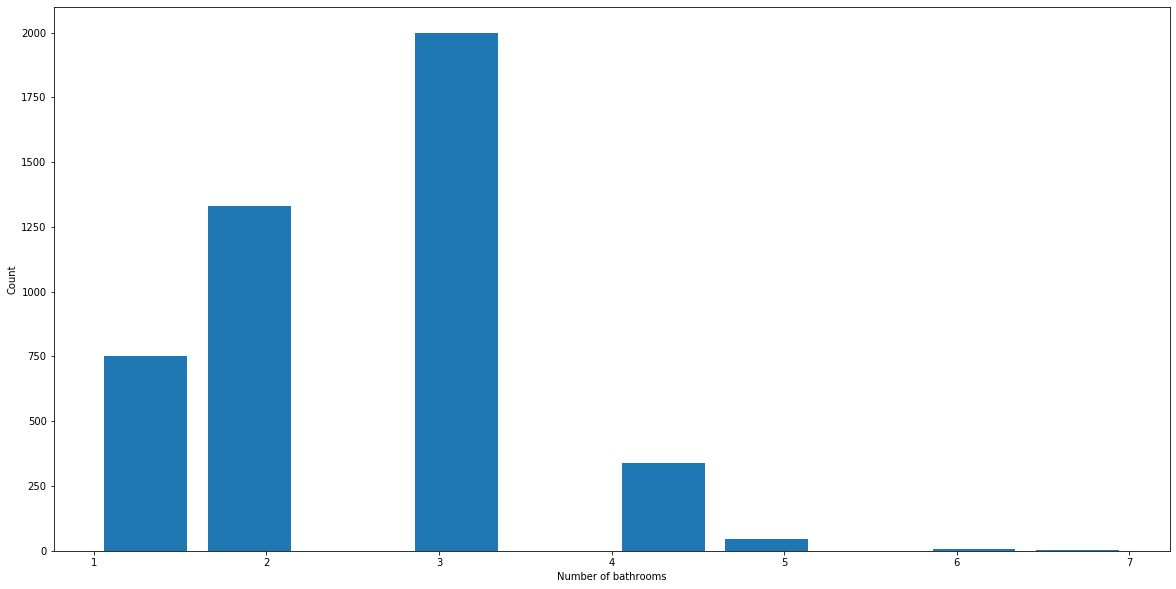

In [172]:
plt.hist(df3.bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

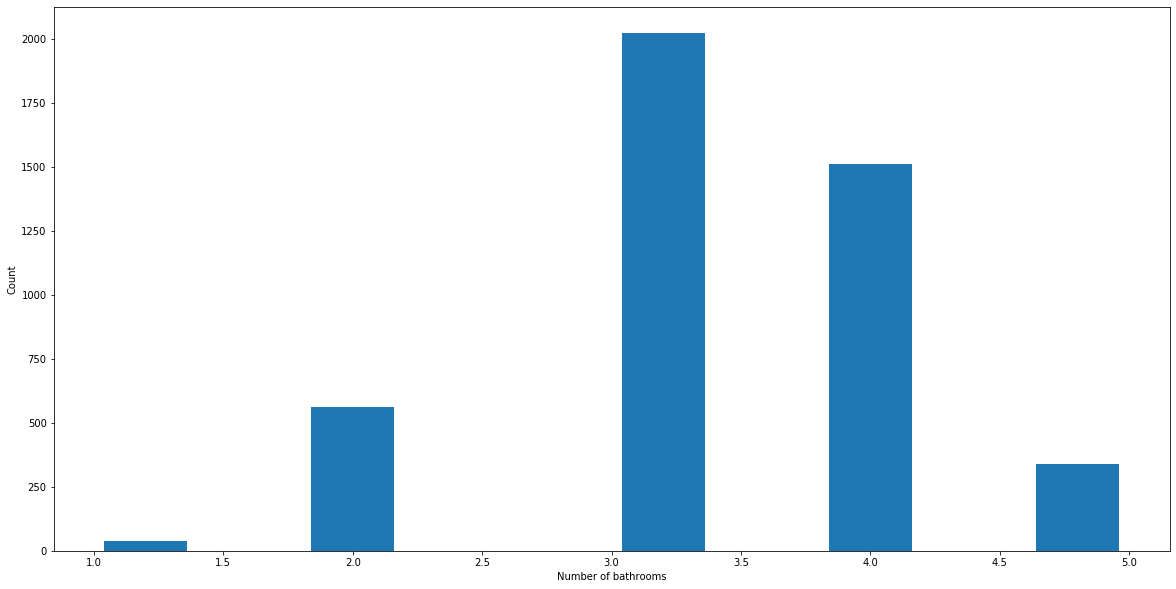

In [173]:
plt.hist(df3.bedrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

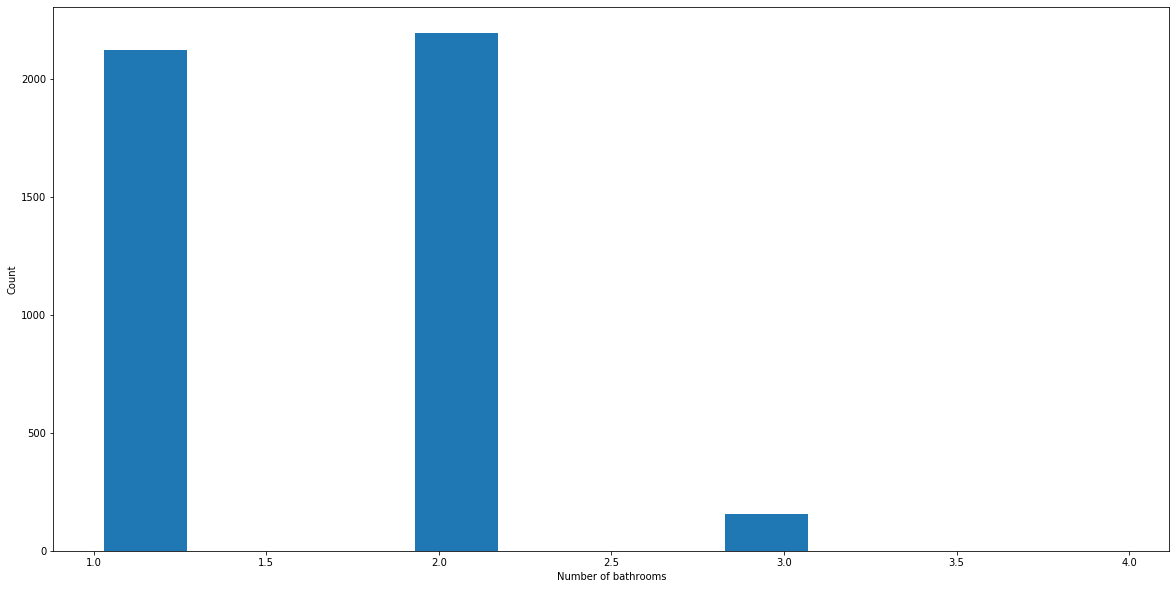

In [174]:
plt.hist(df3.floors,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [175]:
df3.drop(df3[df3['floors'] == 3].index, inplace = True) 

In [176]:
df3.shape

(4316, 7)

In [177]:
df3.drop(df3[df3['bathrooms'] > 5].index, inplace = True) 

In [178]:
df3.shape

(4307, 7)

In [179]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city
0,313000.0,3.0,2,1340,2,1955,Shoreline
1,2384000.0,5.0,3,3650,2,1921,Seattle
2,342000.0,3.0,2,1930,1,1966,Kent
3,420000.0,3.0,3,2000,1,1963,Bellevue
4,550000.0,4.0,3,1940,1,1976,Redmond


### one hot encoding

In [135]:
df3['city'].value_counts()

Seattle                1390
Renton                  282
Bellevue                271
Redmond                 229
Kirkland                186
Kent                    182
Issaquah                174
Auburn                  172
Sammamish               168
Federal Way             141
Shoreline               120
Woodinville             112
Maple Valley             95
Mercer Island            75
Burien                   69
Snoqualmie               67
Kenmore                  64
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Bothell                  33
Newcastle                33
Lake Forest Park         32
Tukwila                  29
Vashon                   29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Medina                   10
Fall City                10
Clyde Hill                8
Black Diamond             8
Ravensdale                7
Pacific             

In [136]:
dummies = pd.get_dummies(df3.city)
dummies.head(3)

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df4 = pd.concat([df3,dummies.drop('Preston',axis='columns')],axis='columns')
df4.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,city,Algona,Auburn,Beaux Arts Village,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,313000.0,3.0,2,1340,2,1955,Shoreline,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,3,3650,2,1921,Seattle,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2,1930,1,1966,Kent,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,3,2000,1,1963,Bellevue,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,3,1940,1,1976,Redmond,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df5 = df4.drop('city',axis='columns')
df5.head(2)

,price,bedrooms,bathrooms,sqft_living,floors,yr_built,Algona,Auburn,Beaux Arts Village,Bellevue,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,313000.0,3.0,2,1340,2,1955,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,3,3650,2,1921,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [139]:
#Build a Model Now

In [140]:
df5.shape


(4307, 49)

In [141]:
X = df5.drop(['price'],axis='columns')
X.head(3)

,bedrooms,bathrooms,sqft_living,floors,yr_built,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,3.0,2,1340,2,1955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,3,3650,2,1921,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3.0,2,1930,1,1966,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
y = df5.price
y.head(3)

0     313000.0
1    2384000.0
2     342000.0
Name: price, dtype: float64

In [143]:
len(y)

4307

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [145]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.05093368713900981

In [146]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.60011995, 0.57720604, 0.07951475, 0.6819343 , 0.61992658])

In [147]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\ragha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 497293480284576.0, tolerance: 126310598644.65784
  positive)
C:\Users\ragha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492883399986049.2, tolerance: 127253150283.78123
  positive)
C:\Users\ragha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133124133054091.0, tolerance: 51249385344.68868
  positive)
C:\Users\ragha\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

,model,best_score,best_params
0,linear_regression,0.511740,{'normalize': False}
1,lasso,0.511931,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-1.232209,"{'criterion': 'mse', 'splitter': 'random'}"


In [190]:
def predict_price(city,bedrooms,bathrooms,sqft,floors,yr):    
    loc_index = np.where(X.columns==city)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = sqft
    x[3] = floors
    x[4] = yr
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [193]:
predict_price('Shoreline',3,2,1340,2,1955)

334249.6061692601